### Este código calcula el número $\pi$ y cuenta la frecuencia con que aparece cada dígito. 

In [1]:
from decimal import Decimal, getcontext
import math as m
import time as t
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate 

In [2]:
getcontext().prec = 1001      # Aquí se indica con cuántas cifras se desea calcular pi

start_time = t.time()
def chudnovsky(n): 
    t = Decimal(0)
    pi = Decimal(0)
    deno = Decimal(0)
    k = 0
    for k in range(n):
        t = (Decimal(-1)**k)*(m.factorial(Decimal(6)*k))*(13591409 + 545140134*k)
        deno = m.factorial(3*k)*(m.factorial(k)**Decimal(3))*(640320**(3*k))
        pi += Decimal(t)/Decimal(deno)
    pi = pi * Decimal(12)/Decimal(640320**Decimal(1.5))
    pi = 1/pi
    return str(pi)

# print("\nTime taken:", t.time() - start_time)

In [3]:
# Aquí se activa el algoritmo anterior. Es suficiente que el argumento sea un orden de magnitud inferior
# al número de cifras deaseado. 

pi = chudnovsky(100)                               
decimalPi = pi[2:]
print("\nTime taken:", t.time() - start_time)


Time taken: 0.10009169578552246


In [4]:
# Se cuentan las veces que aparece cada digito en el desarrollo decimal y se genera la tabla correspondiente

digitos = ["0","1","2","3","4","5","6","7","8","9"]
datos=[]

for i in range(10):
    datos.append(decimalPi.count(str(i)))
    
tabla=[]

for i in range(10):
    tabla.append([i,datos[i]])

print(tabulate(tabla, headers=['dígito','frecuencia'], tablefmt='fancy_grid'))

╒══════════╤══════════════╕
│   dígito │   frecuencia │
╞══════════╪══════════════╡
│        0 │           93 │
├──────────┼──────────────┤
│        1 │          116 │
├──────────┼──────────────┤
│        2 │          103 │
├──────────┼──────────────┤
│        3 │          102 │
├──────────┼──────────────┤
│        4 │           93 │
├──────────┼──────────────┤
│        5 │           97 │
├──────────┼──────────────┤
│        6 │           95 │
├──────────┼──────────────┤
│        7 │           95 │
├──────────┼──────────────┤
│        8 │          101 │
├──────────┼──────────────┤
│        9 │          105 │
╘══════════╧══════════════╛


C:\Users\Medel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


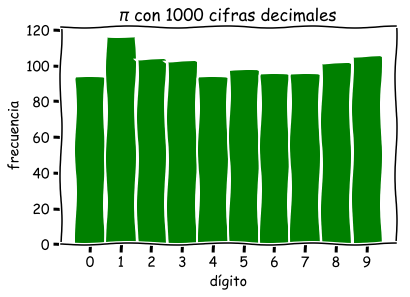

In [5]:
# Se grafican los datos de la tabla anterior

with plt.xkcd():
    fig = plt.figure('Gráfica de barras') # Figure
    plt.xlabel('dígito')
    plt.ylabel('frecuencia')
    plt.title('$\pi$ con 1000 cifras decimales')
    ax = fig.add_subplot(111) # Axes

    xx = range(len(datos))

    ax.bar(xx, datos, width=0.9, align='center', color='g')
    ax.set_xticks(xx)
    ax.set_xticklabels(digitos)

    plt.show()